In [1]:
!pip install scipy -U

     |████████████████████████████████| 38.1 MB 1.1 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
import scipy
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import os
from scipy.optimize import fsolve
import math
import random

# Setting figures style
sns.set(style      = 'whitegrid',
        font_scale = 1.2,
        rc         = {'figure.figsize':(30, 10)})

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/jrzkaminski/mandmmsa/main/train.csv', sep = ',')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
for idx, col in enumerate(data.columns): print(idx,' --- ',col)

0  ---  Id
1  ---  MSSubClass
2  ---  MSZoning
3  ---  LotFrontage
4  ---  LotArea
5  ---  Street
6  ---  Alley
7  ---  LotShape
8  ---  LandContour
9  ---  Utilities
10  ---  LotConfig
11  ---  LandSlope
12  ---  Neighborhood
13  ---  Condition1
14  ---  Condition2
15  ---  BldgType
16  ---  HouseStyle
17  ---  OverallQual
18  ---  OverallCond
19  ---  YearBuilt
20  ---  YearRemodAdd
21  ---  RoofStyle
22  ---  RoofMatl
23  ---  Exterior1st
24  ---  Exterior2nd
25  ---  MasVnrType
26  ---  MasVnrArea
27  ---  ExterQual
28  ---  ExterCond
29  ---  Foundation
30  ---  BsmtQual
31  ---  BsmtCond
32  ---  BsmtExposure
33  ---  BsmtFinType1
34  ---  BsmtFinSF1
35  ---  BsmtFinType2
36  ---  BsmtFinSF2
37  ---  BsmtUnfSF
38  ---  TotalBsmtSF
39  ---  Heating
40  ---  HeatingQC
41  ---  CentralAir
42  ---  Electrical
43  ---  1stFlrSF
44  ---  2ndFlrSF
45  ---  LowQualFinSF
46  ---  GrLivArea
47  ---  BsmtFullBath
48  ---  BsmtHalfBath
49  ---  FullBath
50  ---  HalfBath
51  ---  BedroomAbvG

In [5]:
data1 = data[['SalePrice', 'LotFrontage', 'LotArea', 'GarageArea', 'GrLivArea', '1stFlrSF', 'BedroomAbvGr', 'TotalBsmtSF', 'MSSubClass', 'Street']]
data1.dropna(inplace=True)
data1.reset_index(inplace=True, drop=True)
data['SalePrice'] = data['SalePrice'].apply(lambda x: float(x))
data['LotArea'] = data['LotArea'].apply(lambda x: float(x))
data['GarageArea'] = data['GarageArea'].apply(lambda x: float(x))
data['GrLivArea'] = data['GrLivArea'].apply(lambda x: float(x))
data['1stFlrSF'] = data['1stFlrSF'].apply(lambda x: float(x))
data['TotalBsmtSF'] = data['TotalBsmtSF'].apply(lambda x: float(x))
data['MSSubClass'] = data['MSSubClass'].apply(lambda x: float(x))
data['BedroomAbvGr'] = data['BedroomAbvGr'].apply(lambda x: str(x))
data1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SalePrice,LotFrontage,LotArea,GarageArea,GrLivArea,1stFlrSF,BedroomAbvGr,TotalBsmtSF,MSSubClass,Street
0,208500,65.0,8450,548,1710,856,3,856,60,Pave
1,181500,80.0,9600,460,1262,1262,3,1262,20,Pave
2,223500,68.0,11250,608,1786,920,3,920,60,Pave
3,140000,60.0,9550,642,1717,961,3,756,70,Pave
4,250000,84.0,14260,836,2198,1145,4,1145,60,Pave
...,...,...,...,...,...,...,...,...,...,...
1196,175000,62.0,7917,460,1647,953,3,953,60,Pave
1197,210000,85.0,13175,500,2073,2073,3,1542,20,Pave
1198,266500,66.0,9042,252,2340,1188,4,1152,70,Pave
1199,142125,68.0,9717,240,1078,1078,2,1078,20,Pave


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


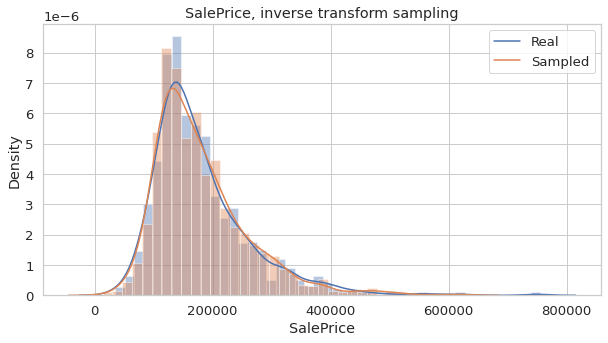

In [6]:
# Approximating SalePrice with Inverse Transform

def inverse_transform_sampling(n, dist, param):
    gen = np.random.uniform(size=n)
    rv = dist(*param)
    return rv.ppf(gen)


params_saleprice = st.exponnorm.fit(data1['SalePrice'])
sampled_saleprice = inverse_transform_sampling(1200, st.exponnorm, params_saleprice)


plt.figure(figsize=(10, 5))
sns.distplot(data1['SalePrice'], kde=True, label='initial data',)
sns.distplot(sampled_saleprice, kde=True, norm_hist=True, label='sampled data')


plt.ylabel('Density')
plt.title('SalePrice, inverse transform sampling')
plt.legend(['Real', 'Sampled'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


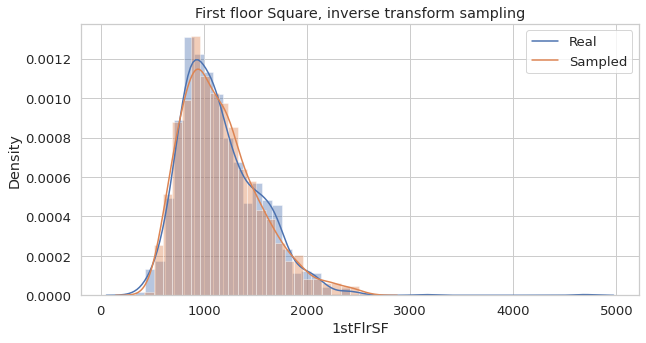

In [8]:
# Approximating 1stFlrSF with Inverse Transform

def inverse_transform_sampling(n, dist, param):
    gen = np.random.uniform(size=n)
    rv = dist(*param)
    return rv.ppf(gen)


params_saleprice = st.skewnorm.fit(data1['1stFlrSF'])
sampled_saleprice = inverse_transform_sampling(1200, st.skewnorm, params_saleprice)


plt.figure(figsize=(10, 5))
sns.distplot(data1['1stFlrSF'], kde=True, label='initial data',)
sns.distplot(sampled_saleprice, kde=True, norm_hist=True, label='sampled data')


plt.ylabel('Density')
plt.title('First floor Square, inverse transform sampling')
plt.legend(['Real', 'Sampled'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


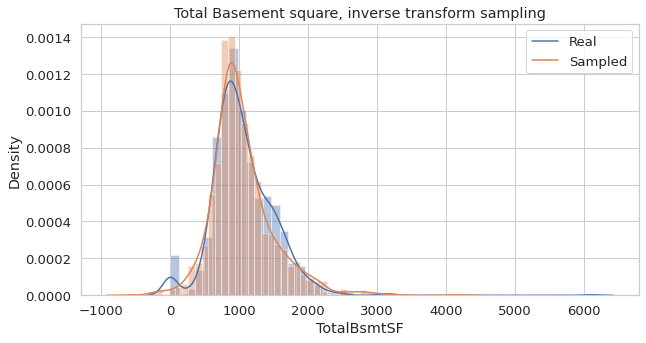

In [9]:
# Approximating TotalBsmtSF with Inverse Transform

def inverse_transform_sampling(n, dist, param):
    gen = np.random.uniform(size=n)
    rv = dist(*param)
    return rv.ppf(gen)


params_saleprice = st.laplace_asymmetric.fit(data1['TotalBsmtSF'])
sampled_saleprice = inverse_transform_sampling(1200, st.laplace_asymmetric, params_saleprice)


plt.figure(figsize=(10, 5))
sns.distplot(data1['TotalBsmtSF'], kde=True, label='initial data',)
sns.distplot(sampled_saleprice, kde=True, norm_hist=True, label='sampled data')


plt.ylabel('Density')
plt.title('Total Basement square, inverse transform sampling')
plt.legend(['Real', 'Sampled'])

Text(0.5, 1.0, 'M=3.7')

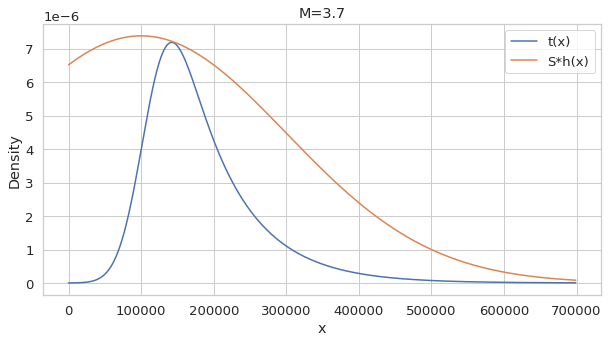

In [11]:
# Approximating SalePrice with Accept-Reject sampling

# normal PDF

def g(x, mu_, sigma_):
    return 1/np.sqrt(2*np.pi)/sigma_ * np.exp(-0.5*((x-mu_)/sigma_)**2)

upper_params = 100000, 200000

M = 3.7
x_vals = np.arange(0, 700000, 1000)
f_vals = st.exponnorm.pdf(x_vals, 2.51753176568288, 109027.06773805487, 29331.74779979515)
g_vals = g(x_vals, *upper_params)
plt.figure(figsize=(10, 5))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x')
plt.ylabel('Density')
plt.legend(['t(x)', 'S*h(x)'])

plt.title("M=%s" % M)

Num Samples Collected: 27159
Efficiency: 0.272


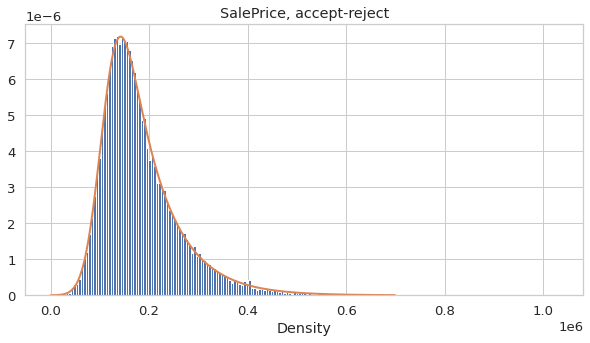

In [ ]:
# collect all accepted samples here
samples = []

# try this many candidates
N = 100000

for _ in range(N):
    # sample a candidate
    candidate = np.random.normal(*upper_params)

    # calculate probability of accepting this candidate
    prob_accept = st.exponnorm.pdf(candidate, 2.51753176568288, 109027.06773805487, 29331.74779979515) / (M*g(candidate, *upper_params))

    # accept with the calculated probability
    if np.random.random() < prob_accept:
        samples.append(candidate)

plt.figure(figsize=(10, 5))
plt.hist(samples, bins=200, density=True)
plt.xlabel('x')
plt.xlabel('Density')
plt.plot(x_vals, [f for f in f_vals], linewidth=2)
plt.title('SalePrice, accept-reject')

print("Num Samples Collected: %s"%len(samples))
print("Efficiency: %s"%round(len(samples) / N, 3))


Text(0.5, 1.0, 'M=4.6')

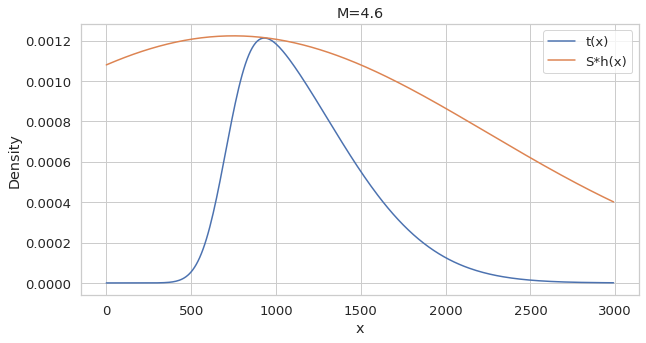

In [ ]:
# Approximating first floor square with Accept-Reject sampling

# normal PDF

def g(x, mu_, sigma_):
    return 1/np.sqrt(2*np.pi)/sigma_ * np.exp(-0.5*((x-mu_)/sigma_)**2)

upper_params = 750, 1500

M = 4.6
x_vals = np.arange(0, 3000, 10)
f_vals = st.skewnorm.pdf(x_vals, 4.86243501, 708.77099293, 592.38429648)
g_vals = g(x_vals, *upper_params)
plt.figure(figsize=(10, 5))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x')
plt.ylabel('Density')
plt.legend(['t(x)', 'S*h(x)'])

plt.title("M=%s" % M)

Num Samples Collected: 21639
Efficiency: 0.216


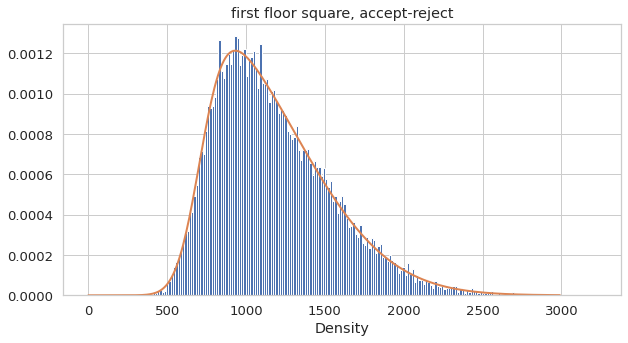

In [ ]:
# collect all accepted samples here
samples = []

# try this many candidates
N = 100000

for _ in range(N):
    # sample a candidate
    candidate = np.random.normal(*upper_params)

    # calculate probability of accepting this candidate
    prob_accept = st.skewnorm.pdf(candidate, 4.86243501, 708.77099293, 592.38429648) / (M*g(candidate, *upper_params))

    # accept with the calculated probability
    if np.random.random() < prob_accept:
        samples.append(candidate)

plt.figure(figsize=(10, 5))
plt.hist(samples, bins=200, density=True)
plt.xlabel('x')
plt.xlabel('Density')
plt.plot(x_vals, [f for f in f_vals], linewidth=2)
plt.title('first floor square, accept-reject')

print("Num Samples Collected: %s"%len(samples))
print("Efficiency: %s"%round(len(samples) / N, 3))

Text(0.5, 1.0, 'M=4.9')

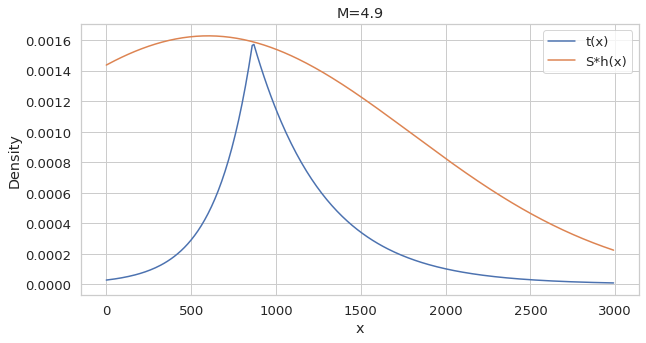

In [ ]:
# Approximating Total basement square with Accept-Reject sampling

# normal PDF

def g(x, mu_, sigma_):
    return 1/np.sqrt(2*np.pi)/sigma_ * np.exp(-0.5*((x-mu_)/sigma_)**2)

upper_params = 600, 1200

M = 4.9
x_vals = np.arange(0, 3000, 10)
f_vals = st.laplace_asymmetric.pdf(x_vals, 0.7199560856166098, 863.9999996464715, 297.130964307078)
g_vals = g(x_vals, *upper_params)
plt.figure(figsize=(10, 5))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x')
plt.ylabel('Density')
plt.legend(['t(x)', 'S*h(x)'])

plt.title("M=%s" % M)

Num Samples Collected: 20346
Efficiency: 0.203


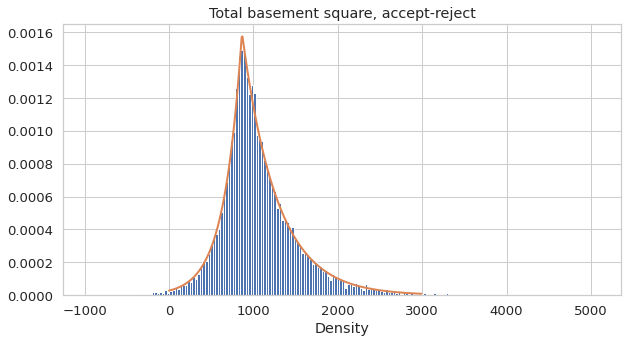

In [ ]:
# collect all accepted samples here
samples = []

# try this many candidates
N = 100000

for _ in range(N):
    # sample a candidate
    candidate = np.random.normal(*upper_params)

    # calculate probability of accepting this candidate
    prob_accept = st.laplace_asymmetric.pdf(candidate, 0.7199560856166098, 863.9999996464715, 297.130964307078) / (M*g(candidate, *upper_params))

    # accept with the calculated probability
    if np.random.random() < prob_accept:
        samples.append(candidate)

plt.figure(figsize=(10, 5))
plt.hist(samples, bins=200, density=True)
plt.xlabel('x')
plt.xlabel('Density')
plt.plot(x_vals, [f for f in f_vals], linewidth=2)
plt.title('Total basement square, accept-reject')

print("Num Samples Collected: %s"%len(samples))
print("Efficiency: %s"%round(len(samples) / N, 3))